# Projet Maths-info n°2 - Equations différentielles

### Thibaut Caillerez
### Marion Isambert

## Importation des bibliothèques utiles

In [1]:
# Import des librairies python utiles pour le projet

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Paramètres graphiques 

plt.rcParams['figure.figsize'] = [10, 10]

# Paramètres de simulation

alpha = 0.7
beta = 0.7
gamma = 0.7
delta = 0.7

## Quelques fonctions utiles

In [2]:
# Déclaration des fonctions utiles 

def x1_prime(x1, x2) :
    return x1*(alpha - beta*x2)

def x2_prime(x1, x2) : 
    return -x2*(gamma - delta*x1)

def H(x1, x2) :
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)

## Etude préliminaire

Le système d'équations étudiées est :

$$
\begin{equation}
\left\lbrace
\begin{array}{ccc}
\dot{x_1} = x_1(\alpha - \beta x_2) \\
\dot{x_2} = x_2(\gamma - \delta x_1)
\end{array}\right.
\end{equation}
$$

#### Question 1

   On se place dans l'interprétation des équations comme une description de 2 populations, $x_1$ étant la population de proies et $x_2$ celle des prédateurs. La quantité de proies dépend du taux de naissances et du taux de décès, qui lui est fonction du nombre de rencontre avec les prédateurs. Ainsi $\alpha$ représente le taux de naissance des proies et est constant et $\beta$ représente le taux de mortalité suite à une rencontre avec un prédateur. D'autre part, $x_2$ varie avec le taux de mortalité des prédateurs, $\delta$ qui est constant, et avec le taux de reproduction ou de vie, $\gamma$, qui dépend du nombre de rencontres entre prédateurs et proies. 
   
   **Etude du système :**
   * On a immédiatement $ x = (0, 0)$ point fixe du système.
   * *Analyse* : On suppose qu'il existe $\bar{x}$ point fixe non nul du système étudié, avec $\bar{x} = (\bar{x_1}, \bar{x_2}).$ Par définition, on a :
   
   $$
   \dot{\bar{x_1}} = 0 = \bar{x_1}(\alpha - \beta \bar{x_2})\\
   \dot{\bar{x_2}} = 0 = \bar{x_2}(\gamma - \delta \bar{x_1})
   $$
   
   or, $\bar{x_1}, \bar{x_2} \neq 0$
   donc $\bar{x_2} = \frac{\alpha}{\beta} > 0$ et $\bar{x_1} = \frac{\gamma}{\delta} > 0$
   
     *Synthèse* : On vérifie aisément que $\bar{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ est le seul point stable non nul du système étudié. 
   
   * On étudie la stabilité du point fixe $\bar{x}$ : 
   
     soit $ f : \mathbb{R}^{+*} \times \mathbb{R}^{+*} \to \mathbb{R}^2 \\
     (x_1, \space x_2) \mapsto (x_1(\alpha - \beta x_2), \space x_2(\gamma - \delta x_1))$ 
     
     continûment différentiable et telle que $f(x) = \dot{x}$.
     
     On a alors $\forall x  \in  \mathbb{R}^{+*} \times \mathbb{R}^{+*}, \space J_f(x) = \begin{pmatrix} \alpha - \beta x_2 & -\beta x_1 \\ \delta x_2 & \gamma - \delta x_1 \end{pmatrix} $
     
     Soit en $\bar{x}$, $J_f(\bar{x}) = \begin{pmatrix} 0 & - \beta \frac{\gamma}{\delta} \\ \delta \frac{\alpha}{\beta} & 0 \end{pmatrix} $
     
     Les valeurs propres de $J_f(\bar{x})$ sont à partie réelle nulle, donc on ne peut pas conclure. 
     

#### Question 2 : portraits de phase

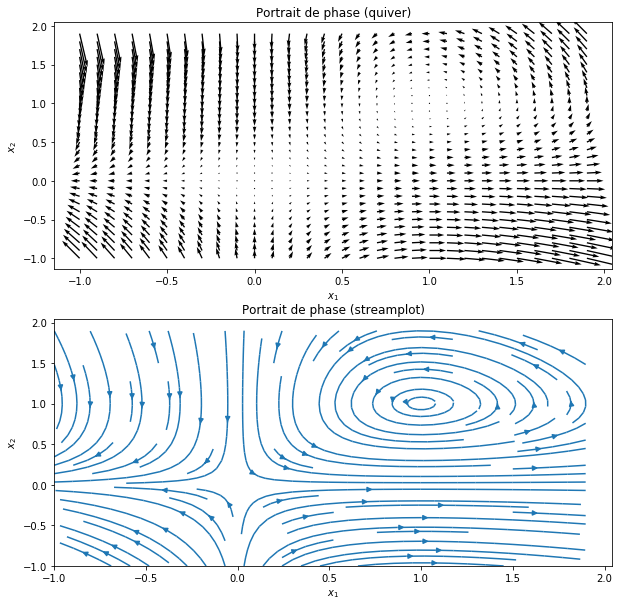

In [3]:
plt.figure()

x1 = np.arange(-1,2,0.1)
x2 = np.arange(-1,2,0.1)

X1,X2 = np.meshgrid(x1, x2)

# Avec quiver

plt.subplot(211, title = "Portrait de phase (quiver)", xlabel = "$x_1$", ylabel = "$x_2$")
u = x1_prime(X1, X2)
v = x2_prime(X1, X2)
plt.quiver(X1, X2, u, v)

# Avec streamplot

plt.subplot(212, title = "Portrait de phase (streamplot)", xlabel = "$x_1$", ylabel = "$x_2$")
u = x1_prime(X1, X2)
v = x2_prime(X1, X2)
plt.streamplot(X1, X2, u, v, density = 1)


plt.show()

#### Question 3

$f$ définie à la question 1 est continûment différentiable sur $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$. On peut alors appliquer le théorème de Cauchy-Lipschitz : 
$
\forall x_0 \in \mathbb{R}^{+*} \times \mathbb{R}^{+*}, \space  \exists ! x_{max} : I \to \mathbb{R}^2 \in S_f(x_0)$ solution maximale du système étudié, avec $I$ un intervalle de $\mathbb{R}$.

Soit donc $x_0$ dans $ \mathbb{R}^{+*}$, $t_0$ dans $\mathbb{R}$ et $x$ la solution maximale associée. 
Que se passe-t'il si l'une des composantes vient à s'annuler ?
* supposons que pour $t_1$ dans $\mathbb{R}$, $x_1(t_1) = 0$ et $x_2(t_1) > 0$. On s'intéresse alors au problème de Cauchy $x^* = x_2(t_1)$ à $t = t_1$. Il admet donc une solution qui à $t_0$ vaut $x_0$. Mais il existe une autre solution $x'$ telle que : 

$
\forall t \in \mathbb{R}, \space x'(t) = (0, \space x^* e^{\gamma (t - t_1)})
$ 
 
  $\space \space \space \space \space$ qui ne vaut pas $x_0$ à $t_0$. On en déduit qu'il est impossible que $x_1$ s'annule.

* supposons que pour $t_2$ dans $\mathbb{R}$, $x_2(t_2) = 0$ et $x_1(t_2) > 0$. On s'intéresse alors au problème de Cauchy $x^* = x_1(t_2)$ à $t = t_2$. Il admet donc une solution qui à $t_0$ vaut $x_0$. Mais il existe une autre solution $x''$ telle que : 

$
\forall t \in \mathbb{R}, \space x''(t) = ( x^* e^{\alpha (t - t_2)})
$ 
 
  $\space \space \space \space \space$ qui ne vaut pas $x_0$ à $t_0$. On en déduit qu'il est impossible que $x_2$ s'annule.


Finalement, une solution initialisée dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$ reste dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$ sur son domaine de définition.

#### Question 4

On a pour tout $x_1, \space x_2$ dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$, $H(x_1, x_2) = \delta x_1 - \gamma \ln(x_1) + \beta x_2 - \alpha \ln(x_2)$

On dérive : 

$\forall (x_1, x_2) \in \mathbb{R}^{+*} \times \mathbb{R}^{+*}, \space \dot{H}(x_1, x_2) = \delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta x_2 - \alpha \frac{\dot{x_2}}{x_2}$

En remplaçant $\dot{x_1}$ et $\dot{x_2}$ par leurs expressions (pour des solutions du système différentiel), on obtient finalement $\dot{H}(x_1, x_2) = 0$, donc $H(x_1, x_2)$ est constante le long d'une trajectoire. 

D'après le théorème du domaine d'existence maximal, pour $x_0 \in \mathbb(R)^2$ et pour $x_max:I\to \mathbb(R)^2$ dans $S_f(x_0)$, on a $I = \rbrack t_m^-, t_m^+\lbrack$, avec :
* si $t_m^-$ fini, alors 
$$
\lim\limits_{\substack{t \to t_m^-}}d((t, \space x(t)), \space \partial (\mathbb{R} \times \mathbb{R}^{+*} \times \mathbb{R}^{+*}) = 0
$$
ou 
$$
\lim\limits_{\substack{t \to t_m^-}} \| x(t) \| = + \infty
$$
* si $t_m^+$ fini, alors 
$$
\lim\limits_{\substack{t \to t_m^+}}d((t, \space x(t)), \space \partial (\mathbb{R} \times \mathbb{R}^{+*} \times \mathbb{R}^{+*}) = 0
$$
ou 
$$
\lim\limits_{\substack{t \to t_m^+}} \| x(t) \| = + \infty
$$

Montrons par l'absurde que $t_m^- = - \infty$ : 


* on suppose que $\lim\limits_{\substack{t \to t_m^-}} \| x(t) \| = + \infty$. En choisissant la norme 1, on a donc $\lim\limits_{\substack{t \to t_m^-}}|max(x1, x2)| = + \infty$, et ainsi $\forall t \in \rbrack t_m^-, \space t_m^+\lbrack, \frac{H(t)}{\| x(t) \|} \geq min(\delta, \beta) - \gamma \frac{ln(x_1(t))}{\| x(t) \|} - \alpha \frac{ln(x_2(t))}{\| x(t) \|}$. 
  Soit en passant à la limite quand $t$ tend vers $t_m^-$ : 
  $H(t)\sim_{\substack{t \to t_m^-}}  \| x(t) \| min(\delta, \beta) \to_{t \to t_m^-} + \infty
  $
  
  Or $H$ doit être constante et on vient de montrer que sous ses hypothèses, elle n'était pas finie en $t_m^-$. Ainsi, $\lim\limits_{\substack{t \to t_m^-}} \| x(t) \| < + \infty$.
  
  
* on suppose que $\lim\limits_{\substack{t \to t_m^-}}d((t, \space x(t)), \space \partial (\mathbb{R} \times \mathbb{R}^{+*} \times \mathbb{R}^{+*}) = 0$. Comme d'après les hypothèses, $t_m^-$ est fini, on a donc nécessairement $\lim\limits_{\substack{t \to t_m^-}}d(x(t), \space \partial (\mathbb{R}^{+*} \times \mathbb{R}^{+*})) = 0$, ce qui signifie soit que $\lim\limits_{\substack{t \to t_m^-}} \| x(t) \| = + \infty$, et on se retrouve alors dans le cas précédent que l'on a montré absurde, soit que $\lim\limits_{\substack{t \to t_m^-}} x_1(t) = \lim\limits_{\substack{t \to t_m^-}} x_2(t) = 0$. On aurait alors $\lim\limits_{\substack{t \to t_m^-}} H(t) = - \infty$ ce qui est absurde. 
Ainsi, nous avons montré que $t_m^-$ ne peut pas être fini et donc que $t_m^- = - \infty$.
En raisonnant de même pour $t_m^+$, on obtient que $t_m^+ = + \infty$ et ainsi que toute fonction maximale est définie sur $I = \mathbb{R}$.

#### Question 5 : courbes de niveau de H

c:\users\marion\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


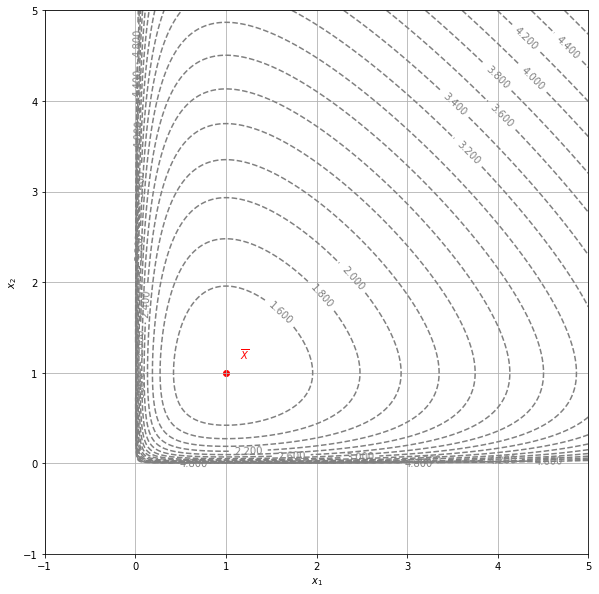

In [4]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

display_contour(H, np.linspace(-1, 5, 1000), np.linspace(-1, 5, 1000), np.arange(-2, 5, 0.2))

plt.scatter(gamma/delta, alpha/beta, color = 'red')
plt.annotate("$ \overline{X} $", xy =(gamma/delta, alpha/beta), xytext =(gamma/delta + 0.15, alpha/beta + 0.15), color = 'red')

plt.show()

On a $ \frac{dH(x_1(t), x_2(t))}{dt} = 0 $ pour $(x_1,x_2)$ solution des équations de Lotka-Volterra d'après la question précédente. Ce qui signifique que pour un $x_0 \in \mathbb{R}_+ ^2 $, point initial ( $ x_0 = (x_1(0),x_2(0))$ ), on a : $$ H(x_1(t), x_2(t)) = H(x_0) = H_0, \space\space \forall t \in \mathbb{R}$$ 

Les solutions appartiennent donc à la courbe de niveau $H_0$. C'est à dire : 

$$
\forall x \in S_{LV}(x_0), \space x \in C_{H_0}
$$

Où $ C_{H_0} $ est la courbe de niveau $H_0$ de $H$.


On conjecturera graphiquement que les courbes de niveau proches de $H(\bar{x})$ forment des boucles autour de $\bar{x}$, ainsi pour tout $x_0$ suffisamment proche de $\bar{x}$, les solutions des équations de Lotka-Volterra ne s'éloignent pas plus qu'une distance arbitraire de $\bar{x}$. Et plus on s'approche de $\bar{x}$, plus la boucle est refermée sur $\bar{x}$

De façon plus formelle on conjecture graphiquement : 
$$ 
\forall \epsilon > 0, \space \exists x_0 \in \mathbb{R}_+^2 \space tel \space que \space C_{H_0} \subset B(\bar{x}, \epsilon) 
$$

Donc on a en particulier $|| x_0 - \bar{x} || < \epsilon $.

Or par ce qui précède :
$$ 
\forall x \in S_{LV}(x_0), \space x \in C_{H_0} 
$$

Donc $|| x(t) - \bar{x} || < \epsilon, \space \forall t \in \mathbb{R} $.

En prenant $\eta = \epsilon $ on a donc : pour tout $\epsilon >0$, il existe $\eta > 0$ tek que pour tout $x_0$ vérifiant $|| x_0 - \bar{x} || < \eta$, toute solution maximale $x \in S_{LV}(x_0)$ vérifie $|| x(t) - \bar{x} || < \epsilon$

Conclusion $\bar{x} $ est stable au sens de la définition de stabilité.

#### Question 6 : Euler explicite

In [5]:
def solve_euler_explicit(f, x0, dt, t0, tf) :
    steps = int((tf-t0)/dt) + 1

    t = np.empty(steps+1)

# On distingue les cas où on a une fonction scalaire et une fonction vectorielle
    if type(x0) == np.ndarray :
        x = np.empty((steps+1,x0.shape[0]))

    else :
        x = np.empty(steps+1)
        
    t[0], x[0] = t0, x0
    

    for i in range(steps) :

        x[i+1] = x[i] + dt*f(t[i], x[i])
        t[i+1] = dt + t[i]
        i += 1

    return t, x

Testons cette méthode sur la fonction exponentielle, solution du problème de Cauchy :
$$
\left\{
    \begin{array}{ll}
        \dot{x} = x = f(t, x), \space \forall t \in \mathbb{R} \\
        x(0) = 1
    \end{array}
\right.
$$

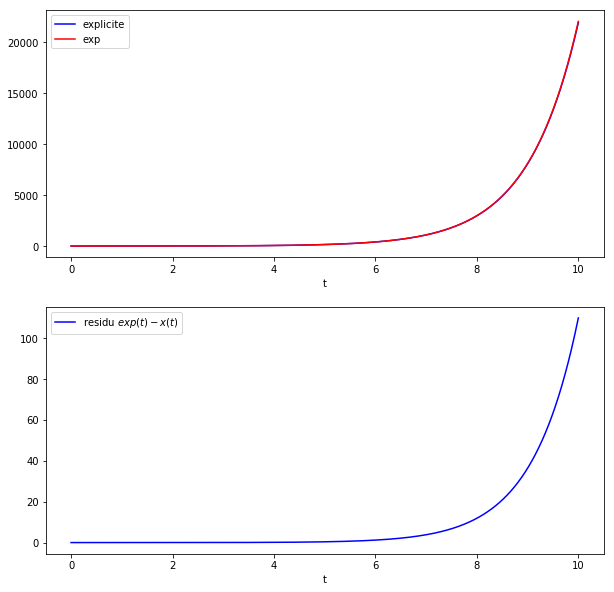

In [6]:
#f(x,t) pour que x : t -> x(t) soit la fonction exponentielle
def f1(t, x) :
    return x
    
T1, X1 = solve_euler_explicit(f1, x0 = 1, dt = 0.001, t0 = 0, tf = 10)


plt.subplot(211)
plt.plot(T1, X1, label = "explicite", color = 'blue')
plt.plot(T1, np.exp(T1), label = "exp", color = 'red')
plt.legend()
plt.xlabel('t')

plt.subplot(212)
plt.plot(T1, abs(np.exp(T1) - X1), label = "residu $exp(t)-x(t)$", color = 'blue')
plt.legend()
plt.xlabel('t')

plt.show();

Pour vérifier la convergence, reproduisons ce graphe pour plusieurs valeures de $dt$.

c:\users\marion\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


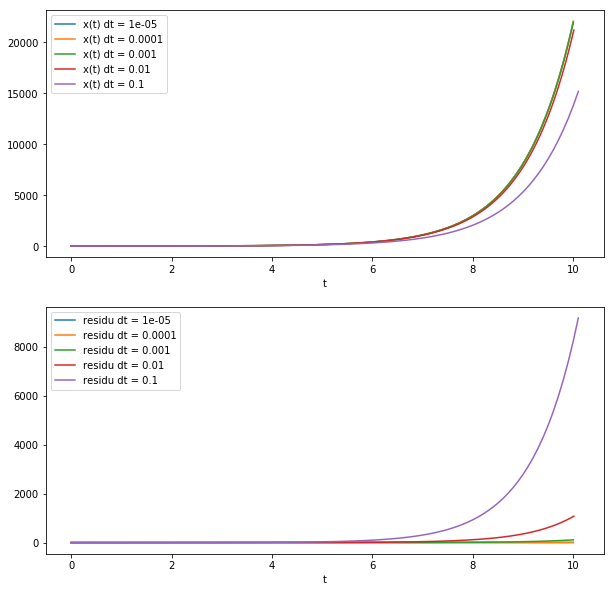

In [7]:
DT_list = np.logspace(-5, -1, 5, base = 10) 

T= np.arange(0,10,1000)
plt.plot(T, np.exp(T), label = "exp")
etamax_list = [] # On stock les valeurs résiduelles max de chaque dt en prévision de la fin de la question

for dt in DT_list :
    
    T, X = solve_euler_explicit(f1, x0 = 1, dt = dt, t0 = 0, tf = 10)

    plt.subplot(211)
    plt.plot(T, X, label = f"x(t) dt = {dt}")

    eta = abs(np.exp(T) - X)

    plt.subplot(212)
    plt.plot(T, eta, label = f"residu dt = {dt}")


    eta_max = np.amax(eta)
    etamax_list.append([eta_max, dt])

etamax_list = np.array(etamax_list) 

plt.subplot(211)
plt.legend()
plt.xlabel('t')

plt.subplot(212)
plt.legend()
plt.xlabel('t')

plt.show();

Avec la réduction de $dt$, les courbes viennent se "coller" à la fonction exacte (ici l'exponentielle), et le résidu décroit.
On cherche à trouver l'ordre de convergence définit par $ p \in \mathbb{N}$ tel que 
$$
\max_{ 0 \leq j \leq J} ||x^j - x(t_j)|| \leq c_v (dt)^p, \space avec \space c_v > 0
$$
Pour cela fait tourner le schéma d'Euler explicite pour plusieurs valeurs de dt comme précédemment et on conserve à chaque fois la valeur résiduelle maximale. Posons $\eta_{max}(dt)$ cette valeur. On trace ensuite la courbe de la fonction $h$ vérifiant $log(\eta_{max}) = h(log(dt))$. On s'attend à pouvoir majorer $h$ par une fonction affine $x \mapsto px+ln(c_v)$ où on retrouve ainsi l'ordre de convergence $p$.

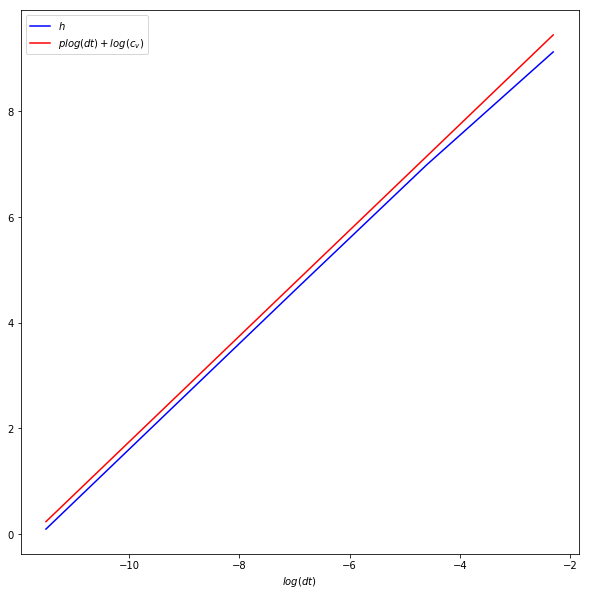

In [8]:
DT_log = np.log(etamax_list[:, 1])
plt.plot(DT_log, np.log(etamax_list[:, 0]), label = "$h$", color = 'blue')


# qu'on peut approximer par :
plt.plot(DT_log, DT_log+11.75, label = "$plog(dt)+log(c_v)$", color = 'red')

plt.xlabel("$log(dt)$")
plt.legend()
plt.show();

On remarque qu'on a une assez bonne approximation de $h$ avec la fonction affine $x \mapsto x + 11.75$. Bien que l'ordonnée à l'origine nous interesse peu ici, on a surtout $p = 1$ comme ordre de convergence.

#### Question 7 : application aux équations de Lotka-Volterra

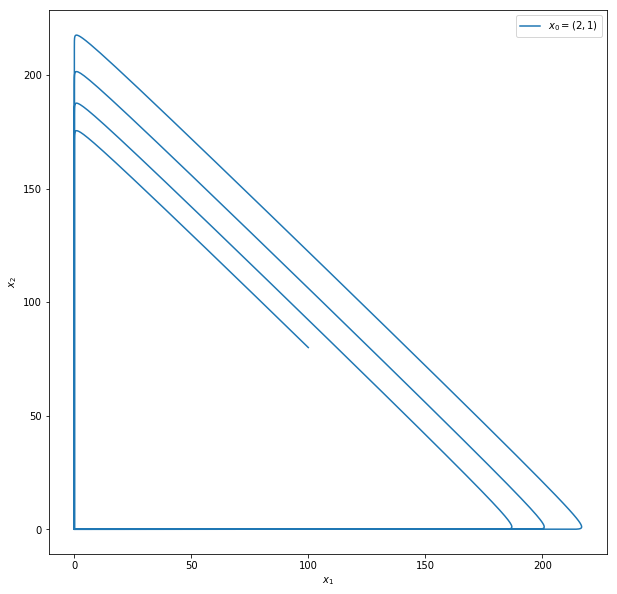

In [9]:
# On commence par créer la fonction vérifiant dx/dt = f(t,x)
def f2(t, x) :
    x1, x2 = x[0], x[1]
    return np.array([x1_prime(x1, x2), x2_prime(x1, x2)])

# Puis on applique le schéma explicite d'Euler
T, X = solve_euler_explicit(f2, x0 = np.array([100, 80]), dt = 10**-3, t0 = 0, tf = 1000)

x1, x2 = X[:, 0], X[:, 1]

plt.plot(x1, x2, label = "$x_0 = (2,1)$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show();

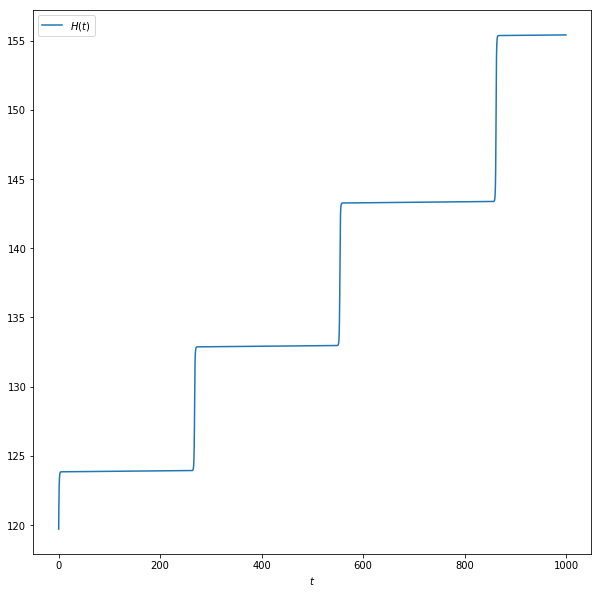

In [10]:
H_list = H(x1, x2)
plt.plot(T, H_list, label = "$H(t)$")
plt.legend()
plt.xlabel("$t$")
plt.show();

On constate qu'avec un temps assez long la fonction diverge, la pseudo boucle qu'elle forme s'élargie à chaque révolution et s'éloigne à chaque fois un peu plus du point d'équilibre, ce qui ne devrait pas être le cas d'après la question 4.
Cette constatation est corroborée par le second graphe. En effet la fonction H devrait être constante le long des solutions, ce n'est pas du tout ce qu'on observe au contraire elle semble varier par palier à chaque révolution de la courbe de niveau.

Le schéma explicite n'est donc pas fidèle à la réalité à temps long.

#### Question 8 : Euler implicite

In [11]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100) :
    steps = int((tf-t0)/dt) + 1

    t = np.empty(steps+1)

    if type(x0) == np.ndarray :
        x = np.empty((steps+1,x0.shape[0]))

    else :
        x = np.empty(steps+1)
        
    t[0], x[0] = t0, x0


    for i in range(steps) :

        t[i+1] = t[i] + dt
        
        L = [x[i] + dt*f(t[i],x[i])]
        k = 0

        while  (k == 0) or (k < itermax and np.linalg.norm((L[-1]-L[-2])/np.linalg.norm(L[0])) <= 10**-7 ) :

            L.append(x[i]+ dt * f(t[i+1], L[-1]))
            k += 1

        x[i+1] = L[-1]

    return t, x


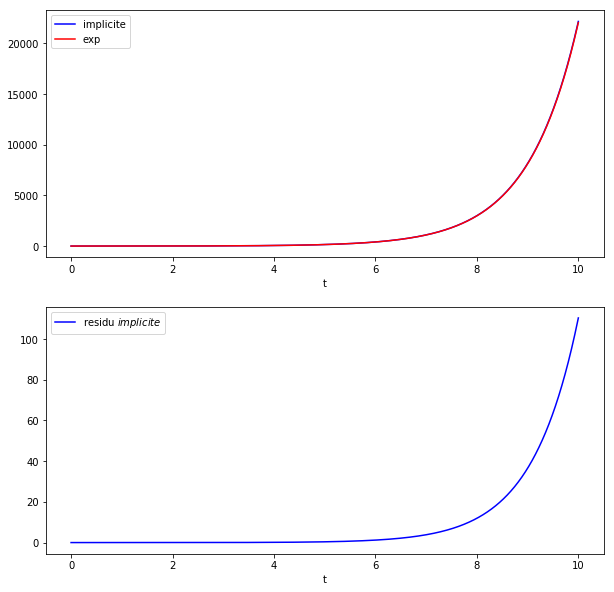

In [12]:
T2, X2 = solve_euler_implicit(f1, x0 = 1, dt = 0.001, t0 = 0, tf = 10)


plt.subplot(211)
plt.plot(T2, X2, label = "implicite", color = 'blue')
plt.plot(T2, np.exp(T2), label = "exp", color = 'red')
plt.legend()
plt.xlabel('t')

plt.subplot(212)
plt.plot(T2, abs(np.exp(T2) - X2), label = "residu $implicite$", color = 'blue')
plt.legend()
plt.xlabel('t')

plt.show();

In [ ]:
DT_list = np.logspace(-4, -1, 4, base = 10) 

T= np.arange(0,10,1000)
plt.plot(T, np.exp(T), label = "exp")

for dt in DT_list :

    T, X = solve_euler_implicit(f1, x0 = 1, dt = dt, t0 = 0, tf = 2)

    plt.subplot(211)
    plt.plot(T, X, label = f"x(t) dt = {dt}")

    eta = abs(np.exp(T) - X)

    plt.subplot(212)
    plt.plot(T, eta, label = f"residu dt = {dt}")



plt.subplot(211)
plt.legend()
plt.xlabel('t')

plt.subplot(212)
plt.legend()
plt.xlabel('t')

plt.show();

Sur la fonction exponentielle, les deux schémas se comportent de la même facon avec la même divergence. Le schéma implicite converge également, toutefois on notera qu'il demande un temps de calcul bien plus long (ce qui nous a contraint à prendre moins de valeurs de dt et une amplitude de temps moins longue). Vérifions si cela change quelque chose sur les équations de Lokta-Volterra.

In [ ]:
T, X = solve_euler_implicit(f2, x0 = np.array([100, 80]), dt = 10**-3, t0 = 0, tf = 1000)

x1, x2 = X[:, 0], X[:, 1]

plt.plot(x1, x2, label = "$x_0 = (2,1)$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show();

In [ ]:
H_list = H(x1, x2)
plt.plot(T, H_list, label = "$H(t)$")
plt.legend()
plt.xlabel("$t$")
plt.show();

Cette fois ci on remarque le phénomène inverse : $H$ décroit le long des solutions trouvées et la boucle se referme sur le point d'équilibre. Ce n'est pas non plus réaliste.

#### Question 9

Soit $u : \mathbb{R}^2 \to \mathbb{R}^2$ continûment différentiable. 

On veut montrer que le terme introduit dans le nouveau système est un terme correctif, qui tend à ramener l'algorithme vers la bonne solution dès qu'il s'en écarte trop, ceci en utilisant la condition $H$ temporellement constante le long d'une trajectoire associée à une solution du système de Lotka-Volterra.

Soit $g : \mathbb{R}^{+*} \times \mathbb{R}^{+*} \to \mathbb{R}^2 \\
     (x_1, x_2) \mapsto (x_1(\alpha - \beta x_2) - u_1(x_1, x_2)(H(x_1, x_2) - H_0), x_2(\gamma - \delta x_1) - u_2(x_1, x_2)(H(x_1, x_2) - H_0))$ 
     
$g$ est continûment différentiable, on peut donc appliquer le théorème de Cauchy-Lipschitz et on obtient 

$\forall x_0 \in \mathbb{R}^{+*} \times \mathbb{R}^{+*},   \exists ! x_{max} : I \to \mathbb{R}^2 \in S_g(x_0)$ solution maximale du système étudié, avec $I$ un intervalle de $\mathbb{R}$.

Soit donc $x_0$ dans $\mathbb{R}^{+*}$, et $x_{max}$ la solution maximale de $S_g(x_0)$ associée. 
Le long de cette solution, on a $H(x_{max}) = H(x_{max}(0)) = H(x_0) = H_0$ qui est donc une constante. 
Prenons maintenant $y_{max}$ la solution maximale de $S_f(x_0)$. On a de même, le long de la trajectoire $H(y_{max}) = H(y_{max}(0)) = H(x_0) = H_0$. Donc $H(y_{max}) = H(x_{max}) = H_0$ et $x_{max}(0) = y_{max}(0) = x_0$, donc par unicité des solutions maximales, on a $x_{max} = y_{max}$, et ainsi les solutions du nouveau système sont les mêmes que celles de Lotka-Volterra.

#### Question 10

On a :

$
\frac{d}{dt}(H(x(t)) - H_0) = - (H(x) - H_0)((\delta - \frac{\gamma}{x_1})u_1(x) + (\beta - \frac{\alpha}{x_2}u_2(x))
$

Or,

$
\nabla H(x) = (\delta - \frac{\gamma}{x_1}, \beta - \frac{\alpha}{x_2})
$

Il suffit donc de choisir 

$
u : (x_1, x_2) \mapsto (k(\delta - \frac{\gamma}{x_1}, k(\beta - \frac{\alpha}{x_2})$ pour que $ \frac{d}{dt}(H(x(t)) - H_0) = -k \| \nabla H(x(t))\|^2(H(x) -H_0)
$

D'après l'énoncé, on a $ \|x - \bar{x} \| \geq c' > 0$, d'où $\| \nabla H(x) \| \geq c > 0$ 

D'où $ \frac{d}{dt}(H(x(t)) - H_0) \leq -k c^2(H(x) -H_0)$

Et ainsi, pour $ \|x - \bar{x} \| > 0$ (i.e $H(x) \neq 0$), $ | H(x) - H_0 | \leq e^{-k c^2 t}$.


Et on a bien $\lim\limits_{\substack{t \to + \infty}} H(x) = H_0$ (convergence exponentielle).

#### Question 11

In [ ]:
k = 1

def u(x) :
    x1, x2 = x[0], x[1]
    return k*np.array([delta - gamma/x1, beta - alpha/x2])


def f3(t, x) :
    x1, x2 = x[0], x[1]
    return f2(t, x) - H(x1,x2) * u(x)

#pour a version implicite, qui prend très très longtemps pour quasiment le même résultat
#T, X = solve_euler_implicit(f3, x0 = np.array([2, 1]), dt = 10**-2, t0 = 0, tf = 300)

#pour la version explicite
T, X = solve_euler_explicit(f3, x0 = np.array([2, 1]), dt = 10**-3, t0 = 0, tf = 500)


x1, x2 = X[:, 0], X[:, 1]

plt.plot(x1, x2, label = "$x_0 = (2, 1)$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show();

In [ ]:
H_list = H(x1, x2)

plt.plot(T, H_list, label = "$H(t)$")
plt.legend()
plt.xlabel("$t$")
plt.xlim(-1,4)

plt.show();

Afin de modifier l'implémentation d'Euler pour stabiliser $H$ il suffit de changer la fonction d'entrée (celle vérifiant $\dot{x} = f(t, x)$) par la fonction décrivant le système de la question 9 comme fait ci-dessus.

Le paramètre $k$ permet de modifier la vitesse de convergence de $H$ vers $H_0$. Plus sa valeur est grande plus $H$ converge rapidement vers $H_0$.

Toutefois on ne peut le définir arbitrairement grand en effet le développement limité de $H(x^{j+1})-H(x_0)$ à l'ordre 1 en $dt$ donne, d'apèrs la relation question 10 :

$$
H(x^{j+1}) - H(x_0) \approx (1-kdt||\nabla H(x^j)||^2)(H(x^j)-H(x_0))
$$


Soit en valeur absolue :

$$
|H(x^{j+1}) - H(x_0)| \approx |1-kdt||\nabla H(x^j)||^2|\space |H(x^j)-H(x_0)|
$$

On déduit alors une condition de convergence qui est : 

$
|1-kdt||\nabla H(x^j)||^2| < 1
$

Donc,

$
-1 < 1-kdt||\nabla H(x^j)||^2 < 1
$


L'inégalité de droite $ kdt||\nabla H(x^j)||^2 > 0 $ est triviale et peu utile, toutefois l'inégalité $kdt||\nabla H(x^j)||^2 < 2 $ donne une condition sur $k$ à chaque étape. Pour garantir un algorithme efficace il faut que même pour un majorant local de $||\nabla H(x^j)||^2$ le produit $kdt||\nabla H(x^j)||^2 < 2 $ reste relativement petit devant 2, ce qui impose de garder $k$ relativement petit.